## Preparation

Loading the dataset about breast cancer:


*   radius (mean of distances from center to points on the perimeter)
*   texture (standard deviation of gray-scale values)

* perimeter

* area

* smoothness (local variation in radius lengths)

* compactness (perimeter^2 / area - 1.0)

* concavity (severity of concave portions of the contour)

* concave points (number of concave portions of the contour)

* symmetry

* fractal dimension (“coastline approximation” - 1)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter(action="ignore")

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
type(cancer)

sklearn.utils._bunch.Bunch

In [ ]:
#cancer['target']

In [ ]:
np.c_[cancer['data'], cancer['target']]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [ ]:
data_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                            columns=np.append(cancer['feature_names'], ['target']))

In [ ]:
data_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

## Data Inspection/Exploration

In [ ]:
# benign means gentle/not harmful, malignant means harmful

In [ ]:
data_cancer.replace({'target': 0}, "malignant", inplace=True)
data_cancer.replace({'target': 1}, "benign", inplace=True)

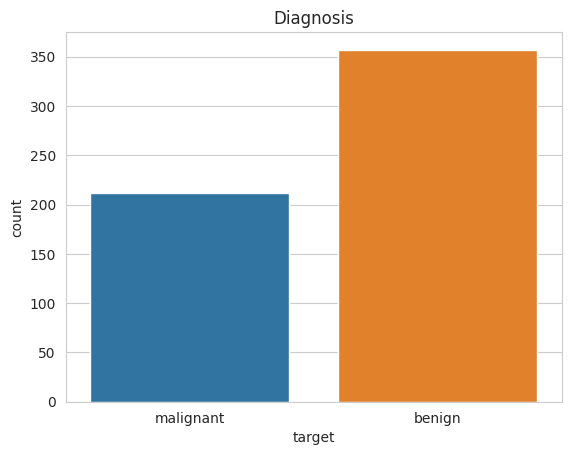

In [ ]:
# inspect the distribution
sns.countplot(data = data_cancer, x='target')
plt.title('Diagnosis');

In [ ]:
# 3D plot to visually ascertain linearly separable or not

import plotly.express as px
 # k
fig = px.scatter_3d(data_cancer, x='mean smoothness', y='mean texture', z='mean compactness', color='target')
fig.show()

In [ ]:
data_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
df_cancer_mean = data_cancer[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']]

In [ ]:
df_cancer_mean

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
# clean up

cols_mean = [col for col in data_cancer if col.startswith('mean')]
cols_mean.append('target')

print(cols_mean)


['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'target']


In [ ]:
df_cancer_mean = data_cancer.loc[:, cols_mean]
display(df_cancer_mean)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,malignant
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,malignant


## 1) Split the Data into Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

# remember stratification on prediction variable
df_train, df_test = train_test_split(df_cancer_mean, test_size=0.2, random_state=42)

print(df_train.shape)
print(df_test.shape)

(455, 11)
(114, 11)


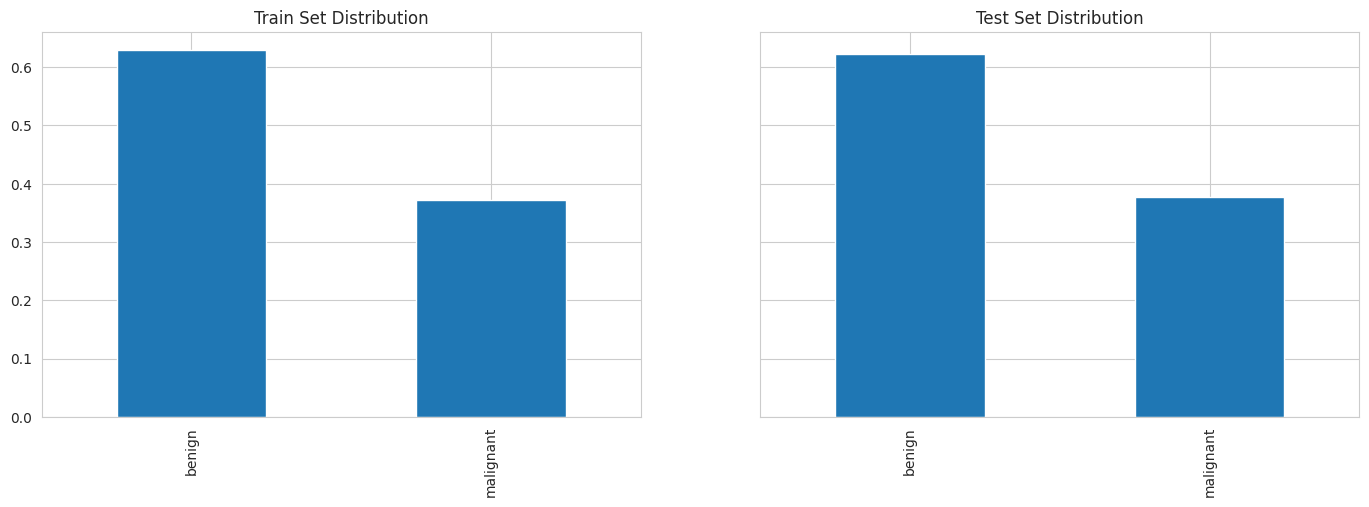

In [ ]:
# verify the stratification

fig, axs = plt.subplots(ncols=2, figsize=(17, 5), sharey=True)
df_train['target'].value_counts(normalize=True).plot(kind='bar', ax=axs[0])
axs[0].set_title("Train Set Distribution")

df_test['target'].value_counts(normalize=True).plot(kind='bar', ax=axs[1])
axs[1].set_title('Test Set Distribution')
plt.show()

## Correlative Feature - Importances

In [ ]:
df_train.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
mean radius,1.000000,0.306881,0.997850,0.986609,0.173051,0.477986,0.647311,0.812377,0.150386,-0.335575
mean texture,0.306881,1.000000,0.313124,0.300314,0.009475,0.229954,0.282160,0.286231,0.108045,-0.079010
mean perimeter,0.997850,0.313124,1.000000,0.985985,0.210092,0.529721,0.688251,0.842081,0.185885,-0.286307
mean area,0.986609,0.300314,0.985985,1.000000,0.180709,0.471296,0.659793,0.814273,0.152679,-0.305321
mean smoothness,0.173051,0.009475,0.210092,0.180709,1.000000,0.672342,0.536920,0.564538,0.539744,0.577171
mean compactness,0.477986,0.229954,0.529721,0.471296,0.672342,1.000000,0.877467,0.825932,0.620483,0.569638
mean concavity,0.647311,0.282160,0.688251,0.659793,0.536920,0.877467,1.000000,0.914671,0.519030,0.349280
mean concave points,0.812377,0.286231,0.842081,0.814273,0.564538,0.825932,0.914671,1.000000,0.476735,0.160184
mean symmetry,0.150386,0.108045,0.185885,0.152679,0.539744,0.620483,0.519030,0.476735,1.000000,0.482673
mean fractal dimension,-0.335575,-0.079010,-0.286307,-0.305321,0.577171,0.569638,0.349280,0.160184,0.482673,1.000000


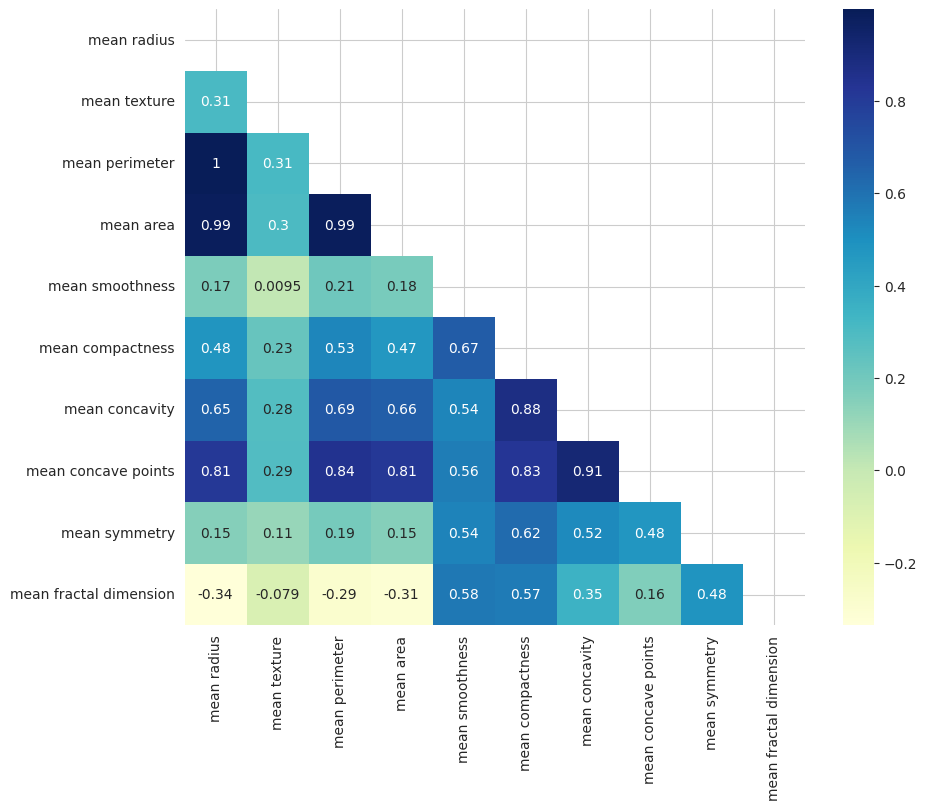

In [ ]:
# inspect the correlation matrix of the numerical features , using seaborn
# use a boolean mask to drop redundant mapping
# and use annot=True to see the magnitude of correlations

fig, ax = plt.subplots(figsize=(10,8))

mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(df_train.corr(),mask=mask , ax=ax, cmap='YlGnBu', annot=True)

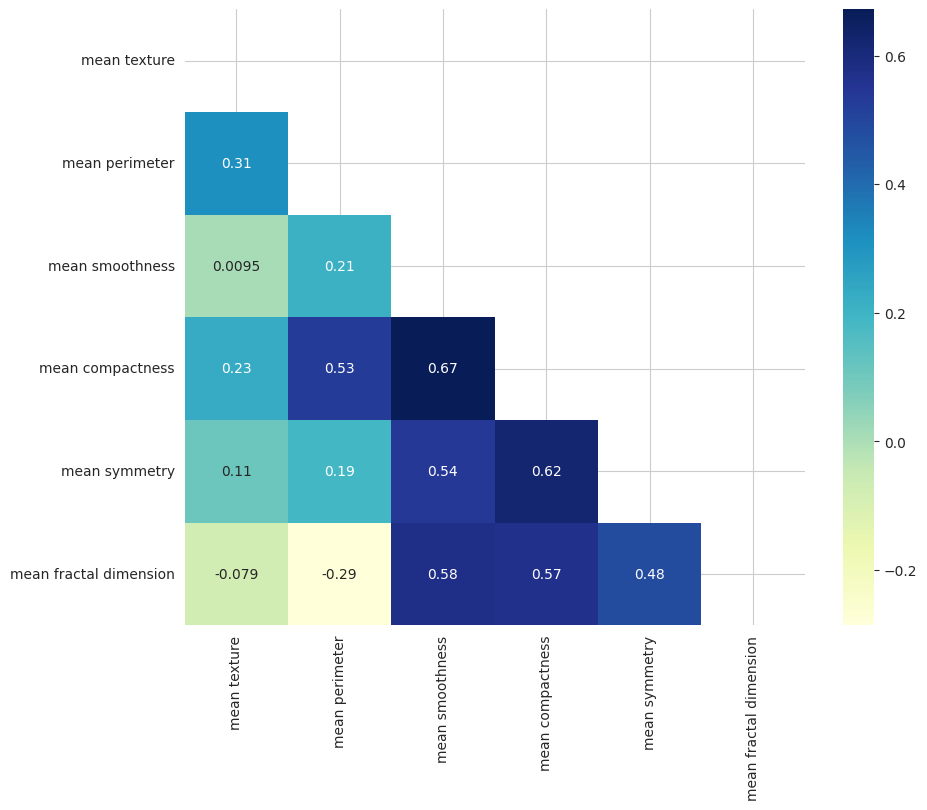

In [ ]:
# drop highly correlated variables
df_train.drop(["mean radius", "mean area", "mean concavity","mean concave points"], axis= 1,  inplace= True)

fig, ax = plt.subplots(figsize=(10,8))

mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(df_train.corr(), mask=mask, ax=ax, cmap='YlGnBu', annot=True)

In [ ]:
# drop the redundant features from test
df_test.drop(["mean radius", "mean area", "mean concavity", "mean concave points"], axis= 1,  inplace= True)


## Feature Scaling

In [ ]:
df_train.head()

,mean texture,mean perimeter,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,target
68,17.33,58.79,0.10660,0.14130,0.2111,0.08046,benign
181,26.57,142.70,0.11410,0.28320,0.2395,0.07398,malignant
63,13.86,59.20,0.07721,0.08751,0.2341,0.06963,benign
248,25.22,68.01,0.09657,0.07234,0.1897,0.06329,benign
60,14.88,64.55,0.11340,0.08061,0.2743,0.06960,benign


In [ ]:
df_train.replace({'target': "malignant"}, 1, inplace=True)
df_train.replace({'target': "benign"}, 0, inplace=True)
df_test.replace({'target': "malignant"}, 1, inplace=True)
df_test.replace({'target': "benign"}, 0, inplace=True)

In [ ]:
df_train.head()

,mean texture,mean perimeter,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,target
68,17.33,58.79,0.10660,0.14130,0.2111,0.08046,0
181,26.57,142.70,0.11410,0.28320,0.2395,0.07398,1
63,13.86,59.20,0.07721,0.08751,0.2341,0.06963,0
248,25.22,68.01,0.09657,0.07234,0.1897,0.06329,0
60,14.88,64.55,0.11340,0.08061,0.2743,0.06960,0


In [ ]:
X_train = df_train.drop("target", axis=1)
y_train = df_train["target"]

X_test = df_test.drop("target", axis=1)
y_test = df_test["target"]

In [ ]:
y_train.value_counts()

0    286
1    169
Name: target, dtype: int64

In [ ]:
y_test.value_counts()

0    71
1    43
Name: target, dtype: int64

In [ ]:
print(X_train.columns)

Index(['mean texture', 'mean perimeter', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension'],
      dtype='object')


In [ ]:
print(X_test.columns)

Index(['mean texture', 'mean perimeter', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension'],
      dtype='object')


In [ ]:
# feature scaling - standardscaler
from sklearn import preprocessing
sc = preprocessing.StandardScaler()

# scaled arrays

X_train_std = sc.fit_transform(X_train)
# fit() / transform()
X_test_std = sc.transform(X_test)

In [ ]:
# verify our scaled result

#display(X_train_std.describe())
display(pd.DataFrame(X_train_std, columns=X_train.columns).describe())

,mean texture,mean perimeter,mean smoothness,mean compactness,mean symmetry,mean fractal dimension
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-3.373126e-15,-3.634699e-15,-4.232024e-15,1.011157e-15,-5.910779e-15,-3.367270e-15
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-2.223500e+00,-1.809497e+00,-3.100011e+00,-1.607228e+00,-2.345430e+00,-1.776889e+00
25%,-7.075360e-01,-6.907613e-01,-7.132037e-01,-7.770872e-01,-7.010461e-01,-7.097920e-01
50%,-1.185158e-01,-2.429378e-01,-8.082013e-02,-2.413402e-01,-6.915087e-02,-1.772851e-01
75%,5.631988e-01,4.884799e-01,6.331729e-01,5.281282e-01,5.354290e-01,4.642225e-01
max,4.715674e+00,3.976811e+00,4.864642e+00,3.964311e+00,4.476124e+00,4.815921e+00


## Create Classifier

## 4.1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # l2 is the default penalty term, C = 1 is the default regularization parameter, lbfgs solver is default

model

LogisticRegression()

In [ ]:
# train the model, FIT ON TRAIN

model.fit(X_train_std, y_train)


# PREDICT ON TEST
y_pred_test = model.predict(X_test_std) # uses as a treshold 0.5 / 50%

# generate probabilities
y_prob_test = model.predict_proba(X_test_std)

print(list(y_pred_test[0:5]))
print(list(y_prob_test[0:5]))

[0, 1, 1, 0, 0]
[array([0.89103252, 0.10896748]), array([0.02930341, 0.97069659]), array([0.10278122, 0.89721878]), array([0.89086276, 0.10913724]), array([0.98889508, 0.01110492])]


In [ ]:
#y_prob_test
y_prob_test[:,1]

array([1.08967479e-01, 9.70696589e-01, 8.97218778e-01, 1.09137236e-01,
       1.11049210e-02, 9.99997963e-01, 9.99915406e-01, 7.79256889e-01,
       2.35361996e-01, 1.11048744e-02, 1.85076500e-01, 7.50022442e-01,
       1.34793511e-01, 9.79268350e-01, 3.38982038e-03, 9.99764685e-01,
       3.76331250e-02, 1.01724805e-02, 2.33479831e-04, 9.99628875e-01,
       1.33541779e-01, 7.56775931e-02, 9.99971612e-01, 1.44914350e-03,
       2.73920770e-02, 3.94154105e-01, 1.01582801e-02, 4.28247572e-02,
       6.43561725e-02, 9.96319192e-01, 5.93510514e-02, 2.61398562e-03,
       3.19554936e-02, 3.82894600e-02, 9.86535367e-03, 2.05277486e-02,
       4.91752351e-01, 1.73090360e-03, 9.62438269e-01, 5.30521850e-01,
       2.91851233e-02, 8.66954413e-01, 5.54459950e-02, 9.85129802e-03,
       1.99605274e-01, 8.49360439e-03, 3.30729286e-02, 9.72596935e-03,
       6.74318202e-02, 6.59467285e-03, 9.50179502e-01, 9.99599547e-01,
       4.65683493e-01, 3.65724718e-01, 6.19985379e-02, 8.70260368e-03,
      

In [ ]:
# look at model performance. Be mindful, this is not a good measure for an imbalanced dataset
print("accuracy score on train set:", model.score(X_train_std, y_train))
print("accuracy score on test set:", model.score(X_test_std, y_test))

accuracy score on train set: 0.9252747252747253
accuracy score on test set: 0.956140350877193


In [ ]:
model.classes_

array([0, 1])

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_true = y_test, y_pred = y_pred_test)
display(pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = y_pred_test)))
# index - actual values, columns - predicted

,0,1
0,70,1
1,4,39


In [ ]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# log loss inspection
from sklearn.metrics import log_loss

In [ ]:
y_prob_test = model.predict_proba(X_test_std)

In [ ]:
#y_prob_test

In [ ]:
y_prob_test[:, 1]

array([1.08967479e-01, 9.70696589e-01, 8.97218778e-01, 1.09137236e-01,
       1.11049210e-02, 9.99997963e-01, 9.99915406e-01, 7.79256889e-01,
       2.35361996e-01, 1.11048744e-02, 1.85076500e-01, 7.50022442e-01,
       1.34793511e-01, 9.79268350e-01, 3.38982038e-03, 9.99764685e-01,
       3.76331250e-02, 1.01724805e-02, 2.33479831e-04, 9.99628875e-01,
       1.33541779e-01, 7.56775931e-02, 9.99971612e-01, 1.44914350e-03,
       2.73920770e-02, 3.94154105e-01, 1.01582801e-02, 4.28247572e-02,
       6.43561725e-02, 9.96319192e-01, 5.93510514e-02, 2.61398562e-03,
       3.19554936e-02, 3.82894600e-02, 9.86535367e-03, 2.05277486e-02,
       4.91752351e-01, 1.73090360e-03, 9.62438269e-01, 5.30521850e-01,
       2.91851233e-02, 8.66954413e-01, 5.54459950e-02, 9.85129802e-03,
       1.99605274e-01, 8.49360439e-03, 3.30729286e-02, 9.72596935e-03,
       6.74318202e-02, 6.59467285e-03, 9.50179502e-01, 9.99599547e-01,
       4.65683493e-01, 3.65724718e-01, 6.19985379e-02, 8.70260368e-03,
      

In [ ]:
pred_proba_malignant = y_prob_test[:, 1]
pred_proba_benign = y_prob_test[:, 0]


In [ ]:
#y_pred = model.predict(X_test_std) uses threshold of 0.5

y_pred_2 = (pred_proba_malignant >= 0.3).astype(int)
# Alternative
#y_pred_2 = (model.predict_proba(X_test_std)[:, 1] > 0.3).astype(int)

In [ ]:
y_pred_2

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [ ]:
display(pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = y_pred_2)))
display(pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = y_pred_test)))



,0,1
0,64,7
1,1,42


,0,1
0,70,1
1,4,39


In [ ]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        71
           1       0.86      0.98      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
print(log_loss(y_train, model.predict_proba(X_train_std)[:, 1]))

0.16845785816000935


In [ ]:
print(log_loss(y_test, y_prob_test[:, 1]))

0.12914450451088708


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prob_test[:, 1])
#roc_auc_score(y_test, model.predict_proba(X_test_std)[:,1])

0.9934490664919752

In [ ]:
# after training how many iterations did we run

model.n_iter_

array([15], dtype=int32)

In [ ]:
# Regularization improvements
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(penalty='l2')

# instantiate and run search
searcher = GridSearchCV(lr, {'C': [0.001, 0.01, 0.1, 1, 10]}, scoring='roc_auc')

searcher.fit(X_train_std, y_train)

# Report best hyperparameters
print("Best GridSearchCV params", searcher.best_params_)



Best GridSearchCV params {'C': 10}


In [ ]:
searcher.best_estimator_

LogisticRegression(C=10)

In [ ]:
#model.coef_

In [ ]:
# find the number of nonzero coefficients
best_lr = searcher.best_estimator_
coefs = best_lr.coef_

print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Total number of features: 6
Number of selected features: 6


In [ ]:
best_lr.coef_

array([[1.49930017, 4.59845729, 1.30167169, 0.01480202, 0.59285014,
        0.19477486]])

In [ ]:
best_lr.coef_.flatten()

array([1.49930017, 4.59845729, 1.30167169, 0.01480202, 0.59285014,
       0.19477486])

In [ ]:
X_train.columns

Index(['mean texture', 'mean perimeter', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension'],
      dtype='object')

In [ ]:
list(zip(X_train.columns, best_lr.coef_.flatten()))

[('mean texture', 1.4993001716095986),
 ('mean perimeter', 4.598457292586072),
 ('mean smoothness', 1.3016716915946263),
 ('mean compactness', 0.014802016378663643),
 ('mean symmetry', 0.5928501387876122),
 ('mean fractal dimension', 0.19477485530219632)]

In [ ]:
variable_rank = pd.DataFrame(list(zip(X_train.columns, best_lr.coef_.flatten())), columns=['variable', 'weight'])
variable_rank = variable_rank.sort_values('weight', ascending=False)
variable_rank

,variable,weight
1,mean perimeter,4.598457
0,mean texture,1.499300
2,mean smoothness,1.301672
4,mean symmetry,0.592850
5,mean fractal dimension,0.194775
3,mean compactness,0.014802


In [ ]:
def train_log_reg(C, penalty, solver):
  lr = LogisticRegression(penalty= penalty, C=C, solver=solver) # l2 is the default
  lr.fit(X_train_std, y_train)
  y_pred_prob = lr.predict_proba(X_test_std)[:,1]
  #roc_auc_score(y_test, y_pred_prob)
  print("acc:",lr.score(X_test_std, y_test), "auc:",roc_auc_score(y_test, y_pred_prob) )
  variable_rank = pd.DataFrame(list(zip(X_train.columns, lr.coef_.flatten())), columns=['variable', 'weight'])
  variable_rank = variable_rank.sort_values('weight', ascending=False)
  print(variable_rank)


In [ ]:
#L2 also Ridge Penalty, penalized the euclidean norm of the weight vector
#L2 is saying that it prefers to spread the levels of influence across all the different values in X!
#Maybe more robust if you come up with x that vary a lot, than the decisions are spread out
# and depend on the entire x vector, rather than  depending only on certain elements of teh x vector

variable_rank = train_log_reg(0.01, "l2", "lbfgs")


acc: 0.8947368421052632 auc: 0.9921388797903701
                 variable    weight
1          mean perimeter  0.655377
3        mean compactness  0.401808
0            mean texture  0.337967
2         mean smoothness  0.244839
4           mean symmetry  0.195399
5  mean fractal dimension -0.133165


In [ ]:
#L1 also Lasso Penalty, penalized the l1 norm of the weight vector
#L1 prefers sparse solutions of the weight vector and drives the influence of a lot of features to 0 except from a few
variable_rank=train_log_reg(0.01, "l1", "saga")


acc: 0.8070175438596491 auc: 0.9764166393711105
                 variable   weight
1          mean perimeter  0.59227
0            mean texture  0.00000
2         mean smoothness  0.00000
3        mean compactness  0.00000
4           mean symmetry  0.00000
5  mean fractal dimension  0.00000


In [ ]:
#L1 ad L2 measure complexity in opposite ways, therefore model complexity by both regularization terms is penalized also in opposite ways.
#Which one to chóose depends on your problem  and how you define complexity. Think about it for your setup, model objective and data!!

# RF Classifier

In [ ]:
# Train XGB model
print('Training XGB and RF classifier...')
from xgboost import XGBClassifier

xgb = XGBClassifier(
    max_depth=10, n_estimators=100,  eval_metric="logloss", learning_rate = 0.1, colsample_bytree = 0.7, use_label_encoder=False, random_state= 42)
xgb.fit(X_train, y_train.ravel())

# Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=15, random_state = 42)
rf.fit(X_train, y_train.ravel())

# Evaluate models
from sklearn.metrics import roc_auc_score
print('XGB AUC is: {:.4}'.format(roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])), 'ACC is: {:.4}'.format(xgb.score(X_test,y_test)))
print('RF AUC is: {:.4}'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])), 'ACC is: {:.4}'.format(rf.score(X_test,y_test)))


Training XGB and RF classifier...
XGB AUC is: 0.9898 ACC is: 0.9561
RF AUC is: 0.9931 ACC is: 0.9649


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=2, max_depth=3) #keep tree at a low depth_
dt_shallow = clf.fit(X_train, y_train)
pred_dt_shallow = dt_shallow.predict(X_test)

In [ ]:
pred_dt_shallow[0:5]

array(['benign', 'malignant', 'malignant', 'benign', 'benign'],
      dtype=object)

In [ ]:
classify_correct_shallow = pred_dt_shallow == y_test
accuracy_shallow = classify_correct_shallow.mean()

accuracy_shallow

0.9210526315789473

In [ ]:
X_train.shape

(455, 6)

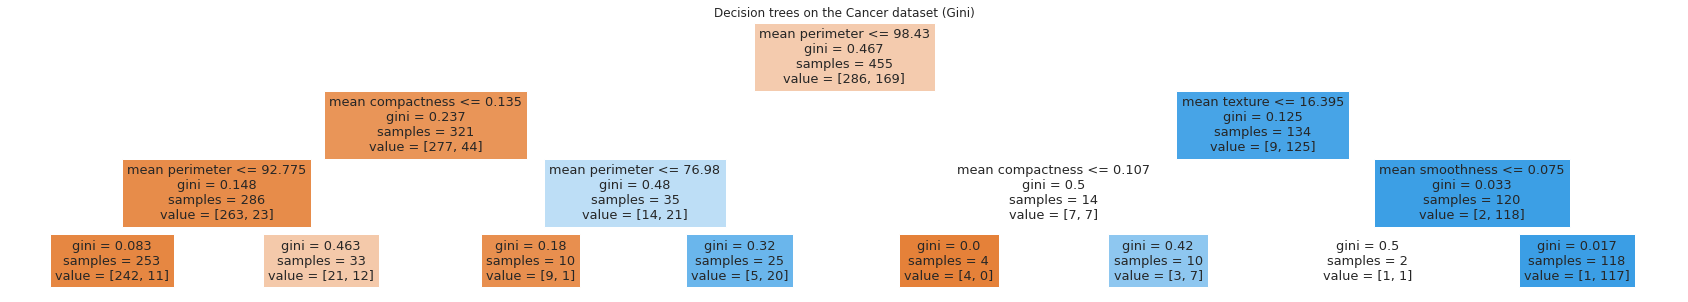

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,5))
tree.plot_tree(dt_shallow, feature_names=X_train.columns,filled=True)
plt.title("Decision trees on the Cancer dataset (Gini)")
plt.show() # the tree looks squished?


Value represent the number of items in each class. in Root node, there are 286 samples of class 0, and 169 of class 1.

EXAMPLE for how to use DT to find predictive thresholds to split a numerical var into categorical ones

In [ ]:
df_cancer_mean.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,malignant


In [ ]:
#decide on teh variable you want to engineer, you do not need a test and train split. because we are purely interested in seeing how to split the variable to make it maximal
#predictive towards a target variable

X=np.array(df_cancer_mean["mean perimeter"]).reshape(-1, 1)
y=np.array(df_cancer_mean["target"]).reshape(-1, 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state=42, min_samples_leaf=40)
                                  #min_samples_leaf=30, max_depth=3)

dec_tree.fit(X,y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

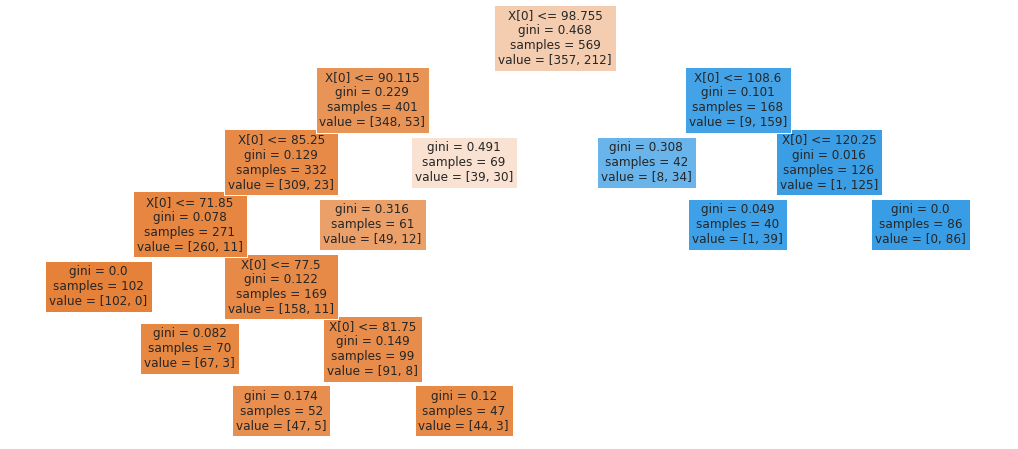

In [ ]:
# plot the decision tree
from sklearn.tree import plot_tree
# readable tree, with restricted depth..
plt.figure(figsize=(18, 8))
plot_tree(dec_tree, fontsize=12, filled=True);


# Global feature importance analysis
Given the interest in xAI, it is not surprising that `sklearn` already provides some nice functionality for explaining model predictions. Being part of the `sklearn` environment, these functions are particularly easy to use and it makes sense to start the tutorial with them. As the title of the section suggests, `sklearn` functionality supports global explanations.

In [ ]:
X_train.columns

Index(['mean texture', 'mean perimeter', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension'],
      dtype='object')

In [ ]:
# Feature importance XGBoost
feat_importances_xgb = pd.Series(xgb.feature_importances_, index= X_train.columns)
feat_importances_xgb.sort_values( ascending=False)

mean perimeter            0.438071
mean compactness          0.184234
mean texture              0.123930
mean smoothness           0.098847
mean fractal dimension    0.092446
mean symmetry             0.062473
dtype: float32

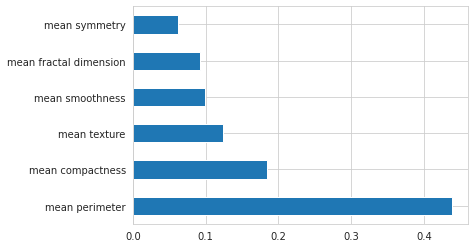

In [ ]:
feat_importances_xgb.nlargest(20).plot(kind='barh');

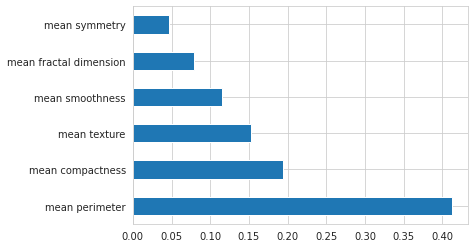

In [ ]:
# Feature importance RF
# relative importance of each feature
feat_importances_rf = pd.Series(rf.feature_importances_, index= X_train.columns)
feat_importances_rf.nlargest(20).plot(kind='barh');

**How to read this plot:** <br>
The plot depicts:
- the features on the y-axis
- their importance on the x-axis

For example, the feature mean perimeter is of great importance for both models, with a value of over 0.4. As said above, these values, e.g., 0.4 represent the total amount of impurity-reduction due to a feature relative to others features. That is, the importance scores have been normalized to sum to one. In this case both models provide similaar results, however sometimes we also note notable differences between the RF and XGB results.

**When to use this plot:** <br>
This plot is handy to improve the process of building our model. As you know, the more features we include in a model, the more likely it is to overfit. This plot shows us how many features contributed to the outcome of our predictions. This can help us identify which features we should keep in our model and which we might be able to leave out. For example, if a var is rarely used for splitting a tree-node and thus contribute little information. T

**Caveats:**<br>
You can think of the above plot as an analog of inspecting regression coefficients in a linear model. A linear model is considered interpretable because the regression coefficients tell you how the model translates feature values into predictions. You get some insight on that matter from the above plot. However, a very importance **piece of information is missing. In which direction does a feature affect predictions?** Knowing the direction of a feature effect - say the sign of a regression coefficient - is crucial to build trust in a model and confirm the estimated feature-to-target relationship to agree with domain knowledge and/or prior believes. Hence, we need more diagnostic tools to complement the analysis. More on that later.


## SVM Classifiers

In [ ]:
# instantiate SVM model

from sklearn import svm
# create the classifier
#set probability to TRUE!
clf = svm.SVC(kernel='linear', probability=True, random_state=0) # linear kernel

clf.fit(X_train_std, y_train)

y_pred_test = clf.predict(X_test_std)
# probabilities
y_prob_test = clf.predict_proba(X_test_std)

print(list(y_pred_test[0:5]))
print(list(y_prob_test[0:5]))

['benign', 'malignant', 'malignant', 'benign', 'benign']
[array([0.89839724, 0.10160276]), array([0.02745618, 0.97254382]), array([0.09733069, 0.90266931]), array([0.88764279, 0.11235721]), array([0.99042494, 0.00957506])]


In [ ]:
# check the score

print("accuracy score on train set:",clf.score(X_train_std, y_train))
print("accuracy score on test set:", clf.score(X_test_std, y_test))

accuracy score on train set: 0.9274725274725275
accuracy score on test set: 0.9649122807017544


In [ ]:
# check our confusion matrix

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = clf.predict(X_test_std)),
             index = clf.classes_ + " actual",
             columns = clf.classes_ + " predicted")

,benign predicted,malignant predicted
benign actual,71,0
malignant actual,4,39


In [ ]:
# support vectors
clf.n_support_

array([42, 45], dtype=int32)

## Visualize SVM Model

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


# Fit SVM model classifier
X = pd.DataFrame(X_train_std, columns=X_train.columns)[['mean texture','mean perimeter']]
y_train_num = y_train.copy()
y_train_num.replace("malignant", 1, inplace=True)
y_train_num.replace("benign", 0, inplace=True)

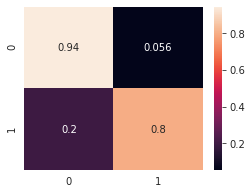

Text(0.5, 1.0, 'SVM Decision Boundary')

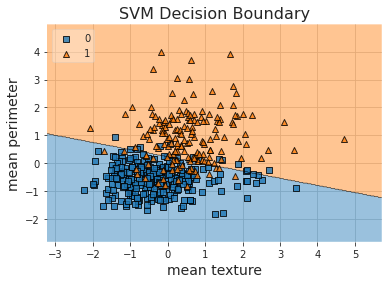

In [ ]:
# instantiate the model
clf2 = svm.SVC(kernel='linear', probability= True, random_state= 0) # Linear
clf2.fit(X, y_train_num)

df_cm = pd.DataFrame(data = confusion_matrix(y_true = y_train_num, y_pred = clf2.predict(X),
                                             normalize= 'true')
             )

plt.figure(figsize= (4,3))
sns.heatmap(df_cm, annot=True)
plt.show()

# Plot Decision Region using mlxtend's awesome plotting function

plot_decision_regions(X=X.values,
                      y=y_train_num.values,
                      clf= clf2,
                      legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Boundary', size=16)

## Cross-Validation

In [ ]:
# you can use cross_val_score for logistic regression too
from sklearn.model_selection import cross_val_score
logReg = LogisticRegression()
scores = cross_val_score(logReg, X_train_std, y_train, cv=5)
scores

array([0.93406593, 0.94505495, 0.93406593, 0.93406593, 0.86813187])

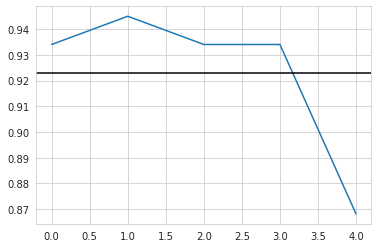

In [ ]:
plt.plot(scores)
plt.axhline(scores.mean(), color="black")
plt.show()